In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [0]:
df = pd.read_csv('/content/drive/My Drive/COVID-19/Total_cases_India (1).csv', index_col='Dates')

In [0]:
print(df)

            India Confirmed Cases  Confirmed Deaths  Confirmed Rcovered
Dates                                                                  
01/22/2020                      0                 0                   0
01/23/2020                      0                 0                   0
01/24/2020                      0                 0                   0
01/25/2020                      0                 0                   0
01/26/2020                      0                 0                   0
...                           ...               ...                 ...
04/18/2020                  15722               521                2463
04/19/2020                  17615               559                2854
04/20/2020                  18539               592                3273
04/21/2020                  20080               645                3975
04/22/2020                  21370               681                4370

[92 rows x 3 columns]


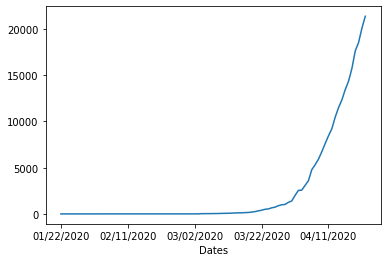

In [0]:
df['India Confirmed Cases'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data = df.filter(['India Confirmed Cases'])

In [0]:
dataset = data.values

In [0]:
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

74

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
scaled_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.67945718e-05],
       [4.67945718e-05],
       [4.67945718e-05],
       [9.35891437e-05],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],
       [1.40383715e-04],


In [0]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.67945718e-05, 4.67945718e-05])]
[4.679457182966776e-05]



In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(64, 10, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
64/64 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 2/50
64/64 [==============================] - 0s 7ms/step - loss: 5.6383e-04
Epoch 3/50
64/64 [==============================] - 0s 6ms/step - loss: 5.0151e-05
Epoch 4/50
64/64 [==============================] - 0s 6ms/step - loss: 3.2776e-05
Epoch 5/50
64/64 [==============================] - 0s 6ms/step - loss: 1.0870e-04
Epoch 6/50
64/64 [==============================] - 0s 6ms/step - loss: 4.8670e-05
Epoch 7/50
64/64 [==============================] - 0s 6ms/step - loss: 6.1877e-05
Epoch 8/50
64/64 [==============================] - 0s 6ms/step - loss: 3.8634e-05
Epoch 9/50
64/64 [==============================] - 0s 6ms/step - loss: 3.5438e-05
Epoch 10/50
64/64 [==============================] - 0s 6ms/step - loss: 3.9058e-05
Epoch 11/50
64/64 [==============================] - 0s 6ms/step - loss: 6.5320e-05
Epoch 12/50
64/64 [==============================] - 0s 6ms/step - loss: 4.3555e-05
Epoc

In [0]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])
  

In [0]:
len(test_data)

28

In [0]:
x_test = np.array(x_test)


In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
x_test

array([[[0.03401965],
        [0.04150679],
        [0.04618624],
        [0.04791764],
        [0.05854001],
        [0.06537202],
        [0.09349555],
        [0.1189986 ],
        [0.12012167],
        [0.14422087]],

       [[0.04150679],
        [0.04618624],
        [0.04791764],
        [0.05854001],
        [0.06537202],
        [0.09349555],
        [0.1189986 ],
        [0.12012167],
        [0.14422087],
        [0.16789892]],

       [[0.04618624],
        [0.04791764],
        [0.05854001],
        [0.06537202],
        [0.09349555],
        [0.1189986 ],
        [0.12012167],
        [0.14422087],
        [0.16789892],
        [0.22358446]],

       [[0.04791764],
        [0.05854001],
        [0.06537202],
        [0.09349555],
        [0.1189986 ],
        [0.12012167],
        [0.14422087],
        [0.16789892],
        [0.22358446],
        [0.24852597]],

       [[0.05854001],
        [0.06537202],
        [0.09349555],
        [0.1189986 ],
        [0.12012167],
  

In [0]:
len(x_test)

18

In [0]:
len(x_train)

64

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
predictions

array([[ 4184.5522],
       [ 4966.241 ],
       [ 6103.5166],
       [ 7404.8936],
       [ 8835.145 ],
       [10443.012 ],
       [12273.201 ],
       [14279.231 ],
       [16420.672 ],
       [18927.254 ],
       [21690.305 ],
       [24589.65  ],
       [27603.588 ],
       [30729.514 ],
       [34081.38  ],
       [37814.113 ],
       [41526.133 ],
       [45289.277 ]], dtype=float32)

In [0]:
len(predictions)

18

In [0]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse


8901.37095811632

In [0]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted Cases'] = predictions



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


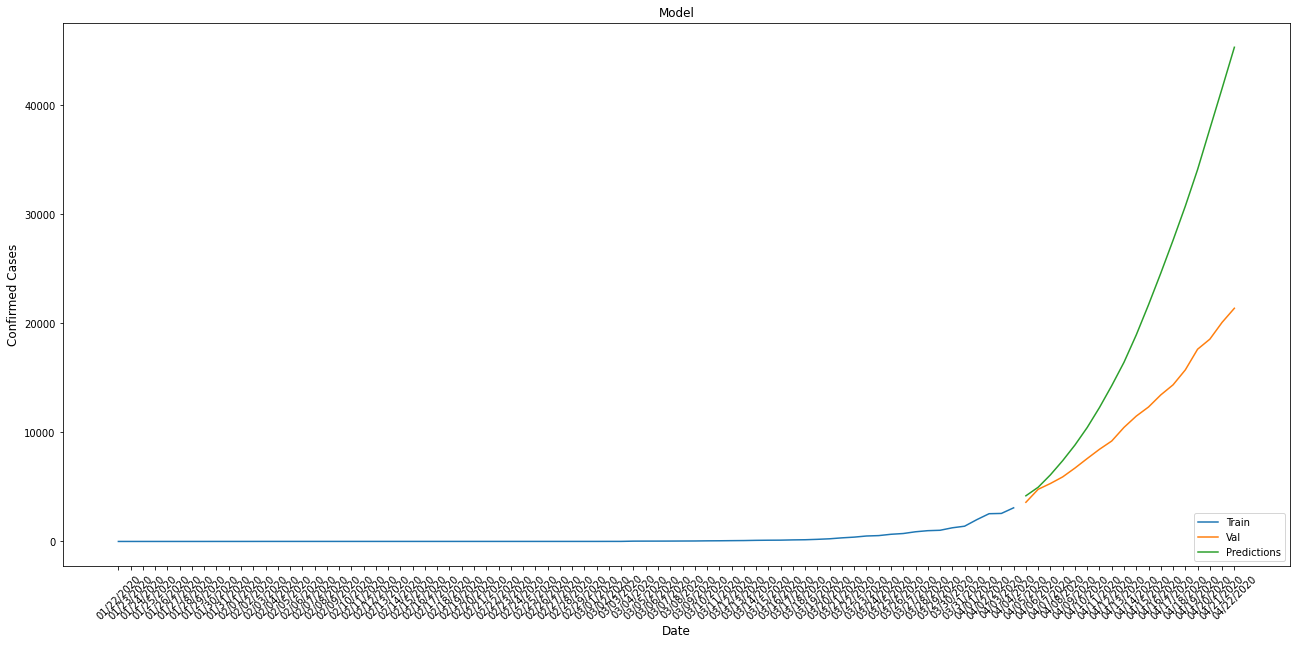

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(train['India Confirmed Cases'])
plt.plot(valid[['India Confirmed Cases', 'Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
#plt.show()

In [0]:
valid

,India Confirmed Cases,Predicted Cases
Dates,,
04/05/2020,3588,4184.552246
04/06/2020,4778,4966.241211
04/07/2020,5311,6103.516602
04/08/2020,5916,7404.893555
04/09/2020,6725,8835.144531
04/10/2020,7598,10443.011719
04/11/2020,8446,12273.201172
04/12/2020,9205,14279.231445
04/13/2020,10453,16420.671875


In [0]:
len(valid)

18

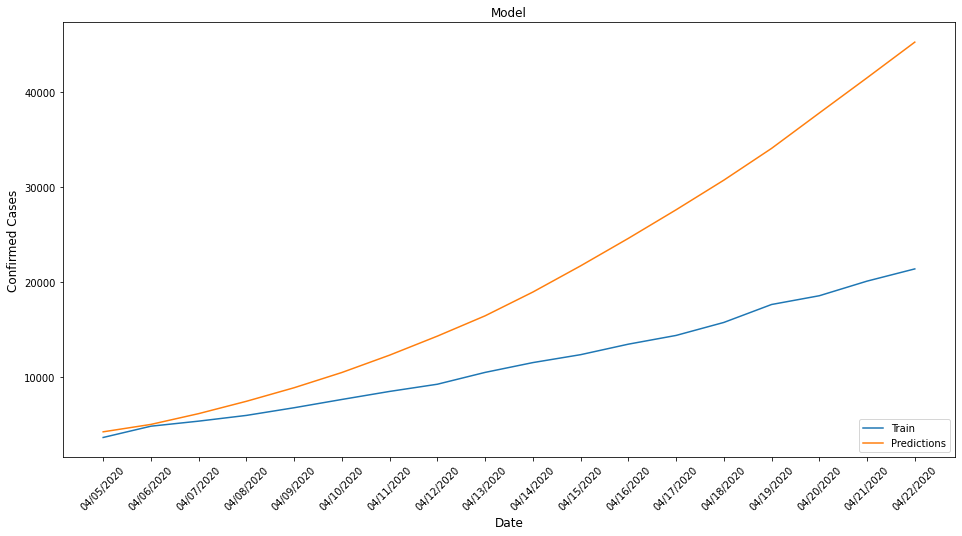

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(valid)
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
#plt.show()

In [0]:
from sklearn.metrics import r2_score
score = r2_score(valid['India Confirmed Cases'], valid['Predicted Cases'])
print(score)

-3.6888663143092577


LSTM FOR ONTARIO DEATHS

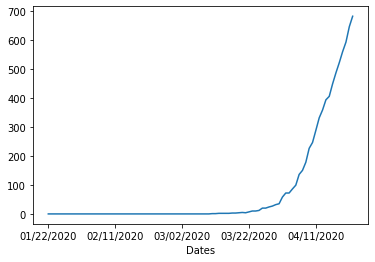

In [0]:
df2 = df['Confirmed Deaths'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data2 = df.filter(['Confirmed Deaths'])

In [0]:
dataset2 = data2.values

In [0]:
training_data_len2 = math.ceil(len(dataset2) * 0.8)
training_data_len2

74

In [0]:
scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler.fit_transform(dataset2)

In [0]:
scaled_data2

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [0]:
train_data2 = scaled_data2[0:training_data_len2, :]
x_train2 = []
y_train2 = []

for i in range(10, len(train_data2)):
  x_train2.append(train_data2[i-10:i, 0])
  y_train2.append(train_data2[i, 0])
  if i<= 10:
    print(x_train2)
    print(y_train2)
    print()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0]



In [0]:
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

In [0]:
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_train2.shape

(64, 10, 1)

In [0]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [0]:
#compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model2.fit(x_train2, y_train2, batch_size=1, epochs=50)

Epoch 1/50
64/64 [==============================] - 1s 14ms/step - loss: 6.4205e-04
Epoch 2/50
64/64 [==============================] - 0s 7ms/step - loss: 1.9381e-04
Epoch 3/50
64/64 [==============================] - 0s 6ms/step - loss: 1.2235e-04
Epoch 4/50
64/64 [==============================] - 0s 6ms/step - loss: 2.9132e-05
Epoch 5/50
64/64 [==============================] - 0s 7ms/step - loss: 7.4976e-05
Epoch 6/50
64/64 [==============================] - 0s 6ms/step - loss: 8.8007e-05
Epoch 7/50
64/64 [==============================] - 0s 7ms/step - loss: 5.7875e-05
Epoch 8/50
64/64 [==============================] - 0s 6ms/step - loss: 5.6431e-05
Epoch 9/50
64/64 [==============================] - 0s 6ms/step - loss: 2.4437e-05
Epoch 10/50
64/64 [==============================] - 0s 6ms/step - loss: 5.2524e-05
Epoch 11/50
64/64 [==============================] - 0s 6ms/step - loss: 6.3550e-05
Epoch 12/50
64/64 [==============================] - 0s 7ms/step - loss: 1.6680e-04


In [0]:
test_data2 = scaled_data2[training_data_len2-10: , :]
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(10, len(test_data2)):
  x_test2.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data2)

28

In [0]:
x_test2 = np.array(x_test2)

In [0]:
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

In [0]:
predictions2 = model.predict(x_test2)
predictions2 = scaler.inverse_transform(predictions2)

In [0]:
rmse = np.sqrt( np.mean( predictions2 - y_test )**2)
rmse

10829.574135674371

In [0]:
train2 = data2[:training_data_len2]
valid2 = data2[training_data_len2:]
valid2['Predicted Deaths'] = predictions2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
valid2


,Confirmed Deaths,Predicted Deaths
Dates,,
04/05/2020,99,114.159409
04/06/2020,136,135.508484
04/07/2020,150,168.031830
04/08/2020,178,204.731567
04/09/2020,226,248.611221
04/10/2020,246,307.592468
04/11/2020,288,372.694366
04/12/2020,331,448.021027
04/13/2020,358,536.101501


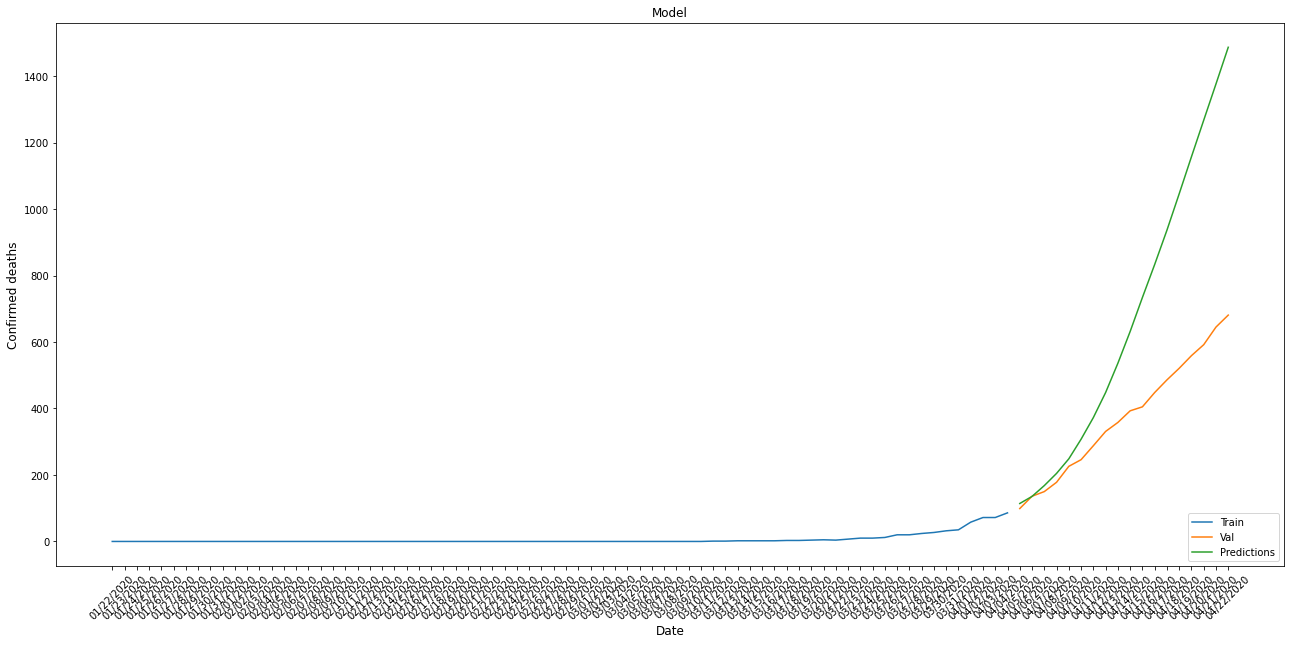

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed deaths', fontsize=12)
plt.plot(train2['Confirmed Deaths'])
plt.plot(valid2[['Confirmed Deaths', 'Predicted Deaths']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

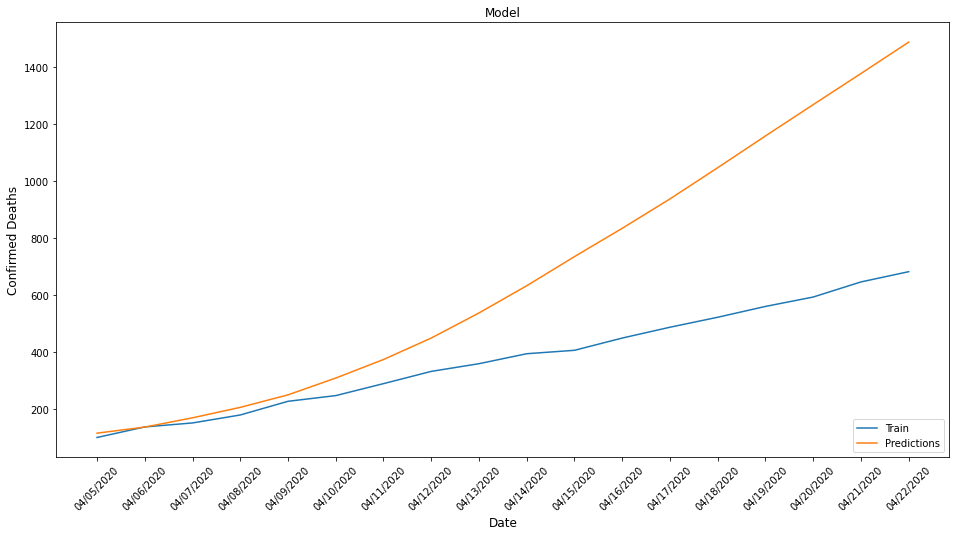

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Deaths', fontsize=12)
plt.plot(valid2)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

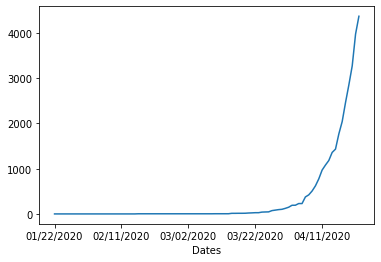

In [0]:
df2 = df['Confirmed Rcovered'].plot()


In [0]:
data3 = df.filter(['Confirmed Rcovered'])

In [0]:
dataset3 = data3.values

In [0]:
training_data_len3 = math.ceil(len(dataset3) * 0.8)
training_data_len3

74

In [0]:
scaler3 = MinMaxScaler(feature_range=(0,1))
scaled_data3 = scaler.fit_transform(dataset3)

In [0]:
scaled_data3

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],
       [6.86498856e-04],


In [0]:
train_data3 = scaled_data3[0:training_data_len2, :]
x_train3 = []
y_train3 = []

for i in range(10, len(train_data3)):
  x_train3.append(train_data3[i-10:i, 0])
  y_train3.append(train_data3[i, 0])
  if i<= 10:
    print(x_train3)
    print(y_train3)
    print()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0]



In [0]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

In [0]:
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(64, 10, 1)

In [0]:
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model3.add(LSTM(50, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))

In [0]:
model3.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
64/64 [==============================] - 1s 14ms/step - loss: 1.5965e-04
Epoch 2/50
64/64 [==============================] - 0s 7ms/step - loss: 9.6233e-05
Epoch 3/50
64/64 [==============================] - 0s 6ms/step - loss: 1.1355e-04
Epoch 4/50
64/64 [==============================] - 0s 6ms/step - loss: 7.0392e-05
Epoch 5/50
64/64 [==============================] - 0s 6ms/step - loss: 8.7027e-05
Epoch 6/50
64/64 [==============================] - 0s 6ms/step - loss: 1.8225e-05
Epoch 7/50
64/64 [==============================] - 0s 6ms/step - loss: 8.8379e-06
Epoch 8/50
64/64 [==============================] - 0s 6ms/step - loss: 7.5734e-06
Epoch 9/50
64/64 [==============================] - 0s 6ms/step - loss: 1.3906e-05
Epoch 10/50
64/64 [==============================] - 0s 6ms/step - loss: 6.6425e-06
Epoch 11/50
64/64 [==============================] - 0s 6ms/step - loss: 8.2617e-06
Epoch 12/50
64/64 [==============================] - 0s 6ms/step - loss: 3.3698e-06


In [0]:
test_data3 = scaled_data3[training_data_len3-10: , :]
x_test3 = []
y_test3 = dataset3[training_data_len3:, :]
for i in range(10, len(test_data3)):
  x_test3.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data3)

28

In [0]:
x_test3 = np.array(x_test3)

In [0]:
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1 ))

In [0]:
predictions3 = model.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)

In [0]:
rmse = np.sqrt( np.mean( predictions3 - y_test )**2)
rmse

7216.8142496744795

In [0]:
train3 = data3[:training_data_len3]
valid3 = data3[training_data_len3:]
valid3['Predicted Recovered Cases'] = predictions3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
valid3


,Confirmed Rcovered,Predicted Recovered Cases
Dates,,
04/05/2020,229,732.564819
04/06/2020,375,869.562500
04/07/2020,421,1078.265991
04/08/2020,506,1313.769409
04/09/2020,620,1595.346558
04/10/2020,774,1973.831299
04/11/2020,969,2391.592285
04/12/2020,1080,2874.966064
04/13/2020,1181,3440.181641


In [0]:
valid_final = valid.join(valid2.join(valid3))
valid_final

,India Confirmed Cases,Predicted Cases,Confirmed Deaths,Predicted Deaths,Confirmed Rcovered,Predicted Recovered Cases
Dates,,,,,,
04/05/2020,3588,4184.552246,99,114.159409,229,732.564819
04/06/2020,4778,4966.241211,136,135.508484,375,869.562500
04/07/2020,5311,6103.516602,150,168.031830,421,1078.265991
04/08/2020,5916,7404.893555,178,204.731567,506,1313.769409
04/09/2020,6725,8835.144531,226,248.611221,620,1595.346558
04/10/2020,7598,10443.011719,246,307.592468,774,1973.831299
04/11/2020,8446,12273.201172,288,372.694366,969,2391.592285
04/12/2020,9205,14279.231445,331,448.021027,1080,2874.966064
04/13/2020,10453,16420.671875,358,536.101501,1181,3440.181641


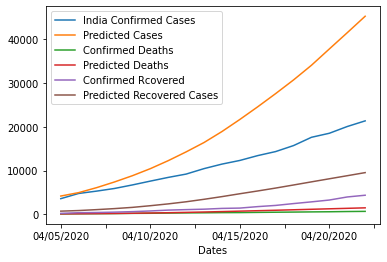

In [0]:
valid_final.plot()

In [0]:
score = r2_score(valid_final['India Confirmed Cases'], valid_final['Predicted Cases'])
score

-3.6888663143092577

In [0]:
score1 = r2_score(valid_final['Confirmed Deaths'], valid_final['Predicted Deaths'])
score1

-4.095915995883101

In [0]:
score3 = r2_score(valid_final['Confirmed Rcovered'], valid_final['Predicted Recovered Cases'])
score3

-5.401803608215881

In [0]:
Average = (score + score1 + score3) / 3
Average

-4.395528639469414